<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [7]:
import os
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Attention, Layer, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from tqdm import tqdm

# **Define Path**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/MyDrive/DR/Train'
test_dir = '/content/drive/MyDrive/DR/Test'
valid_dir = '/content/drive/MyDrive/DR/Valid'

Mounted at /content/drive


# **Image Augmentation**

In [8]:
datagen = ImageDataGenerator(
    horizontal_flip=True,  # Horizontal flip
    vertical_flip=True,  # Vertical flip
    zoom_range=0.2,  # Zoom
    brightness_range=[0.2,1.0]  # Brightness adjustment acting as Gamma correction
)

In [12]:
!ls '/content/drive/MyDrive/DR'
train_dir = '/content/drive/MyDrive/DR/Train'
train_set = datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

Test  Train  Valid
Found 1750 images belonging to 5 classes.


In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')
class_name = train_set.class_indices
print(class_name)

valid_set = train_datagen.flow_from_directory(valid_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 1750 images belonging to 5 classes.
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}
Found 500 images belonging to 5 classes.


# **Model Building**

In [14]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

16705208/16705208 [==============================] - 0s 0us/step


# **Compile the model**

In [15]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# **Train the model**

In [16]:
history = model.fit(train_set, validation_data=valid_set, epochs=10, batch_size=32)


Epoch 1/10
55/55 [==============================] - 1147s 20s/step - loss: 1.0228 - accuracy: 0.5846 - val_loss: 5.6556 - val_accuracy: 0.2000
Epoch 2/10
55/55 [==============================] - 548s 10s/step - loss: 0.6822 - accuracy: 0.7011 - val_loss: 9.1440 - val_accuracy: 0.2000
Epoch 3/10
55/55 [==============================] - 539s 10s/step - loss: 0.5826 - accuracy: 0.7520 - val_loss: 2.5714 - val_accuracy: 0.2000
Epoch 4/10
55/55 [==============================] - 527s 10s/step - loss: 0.5033 - accuracy: 0.7926 - val_loss: 7.0801 - val_accuracy: 0.2000
Epoch 5/10
55/55 [==============================] - 552s 10s/step - loss: 0.4225 - accuracy: 0.8383 - val_loss: 3.8909 - val_accuracy: 0.2000
Epoch 6/10
55/55 [==============================] - 578s 10s/step - loss: 0.3932 - accuracy: 0.8400 - val_loss: 54.0390 - val_accuracy: 0.2000
Epoch 7/10
55/55 [==============================] - 580s 11s/step - loss: 0.4035 - accuracy: 0.8286 - val_loss: 2.6652 - val_accuracy: 0.2000
Epoc

# **Save the model**

In [17]:
model.save("newmodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **About the Model**

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

# **Performance metrics**

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=False)
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

Found 250 images belonging to 5 classes.
8/8 [==============================] - 100s 14s/step


In [20]:
# Compute confusion matrix
cm = confusion_matrix(test_set.classes, y_pred)

<Axes: >

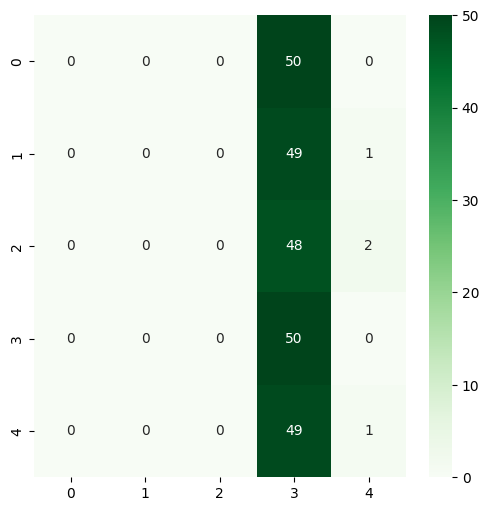

In [24]:
# Create heatmap from confusion matrix
!pip install seaborn
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d",
            xticklabels=train_set.class_indices.keys(),
            yticklabels=train_set.class_indices.keys(), ax=ax)

In [22]:
# Set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

In [23]:
# Compute classification report
report = classification_report(test_set.classes, y_pred,
                               target_names=train_set.class_indices.keys())
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50
           3       0.20      1.00      0.34        50
           4       0.25      0.02      0.04        50

    accuracy                           0.20       250
   macro avg       0.09      0.20      0.07       250
weighted avg       0.09      0.20      0.07       250



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
precision = precision_score(test_set.classes, y_pred, average='macro')
recall = recall_score(test_set.classes, y_pred, average='macro')
accuracy = accuracy_score(test_set.classes, y_pred)
f1 = f1_score(test_set.classes, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

Precision: 0.09065040650406504
Recall: 0.20400000000000001
Accuracy: 0.204
F1 Score: 0.07497497497497499


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
